<a href="https://colab.research.google.com/github/Deborshi18/-Deep-Learning-fashion-MNIST/blob/master/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#dataset
fashion_data=keras.datasets.fashion_mnist
(train_image,train_label),(test_image,test_label)=fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_image.shape

(60000, 28, 28)

In [0]:
train_label.shape

(60000,)

In [0]:
test_image.shape

(10000, 28, 28)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

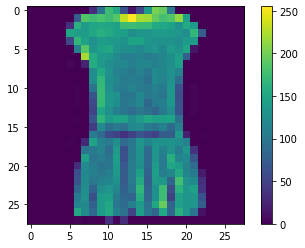

In [0]:
#Preprocessing
plt.figure()
plt.imshow(train_image[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#as the image scales from 0 to 255 we need to normalize it
train_image=train_image/255.0
test_image=test_image/255.0

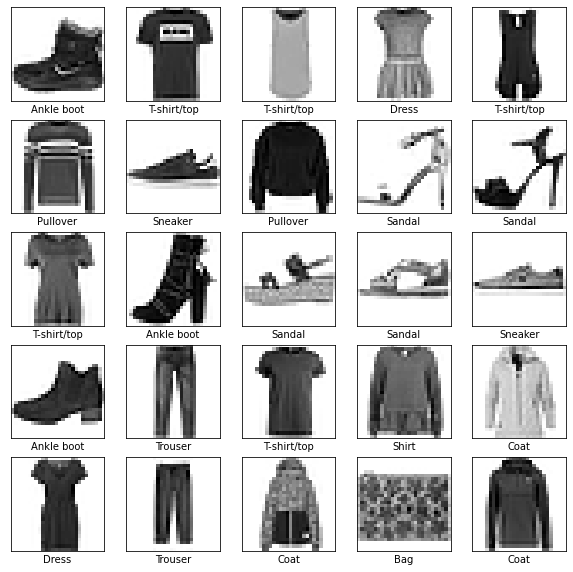

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_image[i],cmap=plt.cm.binary)
  plt.grid(False)
  plt.xlabel(class_names[train_label[i]])
plt.show()

In [0]:
#creating the model
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(64,activation='relu'),
                        keras.layers.Dense(10)
])

In [0]:
#compiling the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
#training the model
model.fit(train_image,train_label,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4940 - accuracy: 0.8257
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3717 - accuracy: 0.8633
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3343 - accuracy: 0.8772
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8847
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.8914
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.8953
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.8982
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2558 - accuracy: 0.9043
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2474 - accuracy: 0.9073
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [0]:
#evaluating accuracy
test_loss,test_acc=model.evaluate(test_image,test_label,verbose=2)
print("\nTest Accuract: ",test_acc)

313/313 - 0s - loss: 0.9352 - accuracy: 0.8823

Test Accuract:  0.8823000192642212


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_image)


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


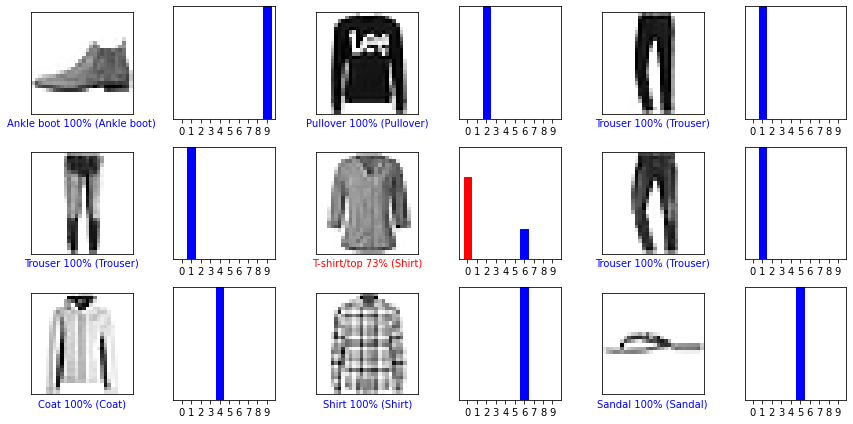

In [0]:
num_rows = 3
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()


In [0]:
import cv2


In [0]:
import matplotlib.image as mpimg 

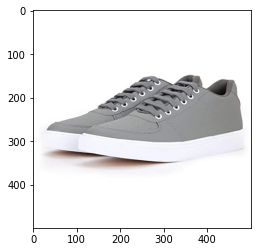

In [0]:
img = mpimg.imread('/content/sneaker.jpg') 
  
# Output Images 
plt.imshow(img) 

In [0]:
img.shape

(500, 500, 3)

In [0]:
dim=(28,28)

In [0]:
resized = cv2.resize(img,dim, fx=28,fy=28 ,interpolation = cv2.INTER_NEAREST) 

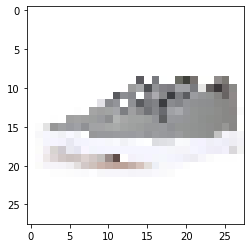

In [0]:
plt.imshow(resized)

In [0]:
#img1 = (np.expand_dims(resized,0))
img1.shape

(1, 28, 28, 3)

In [0]:
i=resized[:,:,0]

In [0]:
img1 = (np.expand_dims(i,0))

In [0]:


predictions_single = probability_model.predict(img1)

print(predictions_single)


[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


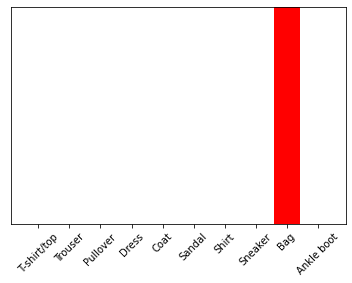

In [0]:
plot_value_array(1, predictions_single[0], test_label)
_ = plt.xticks(range(10), class_names, rotation=45)


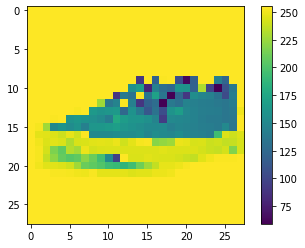

In [0]:
plt.figure()

plt.imshow(i)
plt.colorbar()
plt.show()

In [0]:
img1 = (np.expand_dims(i,0))

In [0]:
img1=img1/255.0

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.4563365e-37
  0.0000000e+00 1.2196211e-37 0.0000000e+00 1.0000000e+00 0.0000000e+00]]


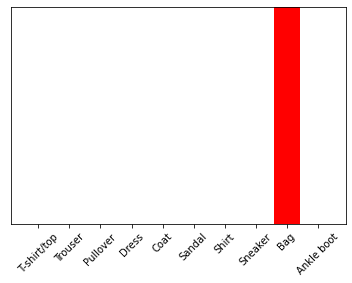

In [0]:

predictions_single = probability_model.predict(img1)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_label)
_ = plt.xticks(range(10), class_names, rotation=45)